### 讀入模型

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("C_batch_feature_norm.csv", index_col=0)
s_result_all = df.to_numpy()
print(s_result_all.shape)
mean_arr=s_result_all.transpose()
print(mean_arr.shape)


(180, 25)
(25, 180)


### 計算特徵值

In [25]:
from main import allFeature, create_matrices, allFeatureNorm, SSDFeature
import cv2

#pixart7920_img="img/2023_1_16_15_56_33_Image.bmp" # theta=-78
pixart7920_img="img/2023_1_16_11_43_53_Image.bmp" # theta=51
#pixart7920_img="img/2023_1_16_11_43_43_Image.bmp" # theta=89

arr = cv2.cvtColor(cv2.imread(pixart7920_img), cv2.COLOR_BGR2GRAY)
y=allFeatureNorm(arr)
print(y)

[0.74137931 0.2183908  0.02298851 0.01149425 0.         0.
 0.65384615 0.25961538 0.04807692 0.02403846 0.00961538 0.
 0.453125   0.23828125 0.10546875 0.078125   0.06640625 0.0546875
 0.96296296 0.01851852 0.         0.         0.         0.        ]


### 估計角度
#### KD 搜尋最近特徵
#### crop 42x42

(25, 180)
(180, 24)
最近鄰居的索引: [51]
最近鄰居與查詢資料的距離: [0.0493702]
theta= [51]
(42, 42)


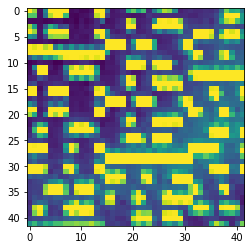

In [26]:
from sklearn.neighbors import BallTree
import numpy as np

# 創建一個24維度的數據表，共有180行
data_table = np.transpose(mean_arr[1:25:])
print(mean_arr.shape)
print(data_table.shape)

# 創建一個BallTree對象，並使用數據表構建k-d tree
tree = BallTree(data_table)


# 使用k-d tree查找最近鄰居，返回最近鄰居的索引和距離
distance, index = tree.query(y.reshape(1, -1), k=1)

# 打印查找到的最近鄰居的索引和距離
print('最近鄰居的索引:', index[0])
print('最近鄰居與查詢資料的距離:', distance[0])
minIdx=index[0]

if minIdx>90:
    theta =  minIdx-180
else:
    theta=minIdx
print("theta=",theta)    
correct_challenge=create_matrices(arr, theta, scale=4)

print(correct_challenge.shape)
plt.imshow(correct_challenge)